Установка Keras Tuner

In [ ]:
!pip install -U keras-tuner

     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=c0182a181e4f8689662a4cd1121b658c0d465fb3e2210af9e70280dda245a105
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=e8de022f30f2af0b49e4646e39a71b68c80d67a4e1689fe213dca1400a1ddc1b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


Импорт модулей

In [ ]:
import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback
from kerastuner.tuners import Hyperband
import IPython

Загрузка данных

In [ ]:
data = pd.read_csv('/content/drive/My Drive/data_analystic/lab1/train.csv')
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


# Подготовка данных

Удаление столбцов  id и timestamp

In [ ]:
del data['id']
del data['timestamp']
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


Сохранение значений таргетного поля

In [ ]:
y = data.get('price_doc')
data = data.drop('price_doc', axis=1)
y

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

Замена полей, содержащих NaN или текстовые значения

In [ ]:
data[data.columns] = SimpleImputer(strategy="most_frequent").fit_transform(data[data.columns])
df = pd.DataFrame(data)
data = df.apply(preprocessing.LabelEncoder().fit_transform)
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,38,22,4,17,0,112,2,1,1,0,9,49,135,86,2,136,112,5,134,113,5,0,15,1,0,7,3,0,0,13,1,0,0,0,0,0,0,0,0,78,...,68,776,442,921,5,21,22,16,3,1,0,2,4,0,0,21,1,717,1193,29,1073,52,5130,152,2963,2113,3261,12,39,48,40,9,4,0,13,22,1,0,52,4
1,29,14,3,17,0,112,2,1,1,0,70,87,113,117,46,115,82,5,124,61,8,0,14,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,59,...,30,630,479,903,1,11,11,4,2,1,0,1,7,0,6,19,1,449,2349,66,3540,40,3559,177,1506,1251,1892,9,49,65,36,15,3,0,15,29,1,10,66,14
2,38,24,2,17,0,112,2,1,1,0,129,29,95,63,70,100,30,4,102,46,7,0,44,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,0,89,...,41,1848,1265,2557,2,9,17,9,3,1,0,0,11,0,0,20,6,776,2003,43,2361,35,2563,122,2698,2332,3353,10,29,45,25,10,3,0,11,27,0,4,67,10
3,84,45,9,17,0,112,2,1,1,0,65,108,143,87,56,143,117,9,143,122,10,0,22,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,0,21,...,32,2302,1515,3016,0,5,14,10,3,0,0,1,2,0,0,18,3,825,253,8,137,22,547,61,6784,5909,7410,4,7,21,15,11,2,1,4,4,0,0,26,3
4,72,72,4,17,0,112,2,1,1,0,6,77,106,6,38,97,84,7,110,87,9,0,23,4,2,22,2,0,0,10,28,0,0,0,1,1,0,0,0,25,...,712,4189,2993,5060,63,245,252,241,145,57,4,70,120,1,40,77,5,296,954,651,5604,114,4794,1444,5841,4912,6389,143,544,545,525,317,108,17,135,236,2,91,195,14


Стандартизация данных

In [ ]:
mean = data.mean(axis=0)
std = data.std(axis=0)
data -= mean
data /= std
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,-0.514273,-0.220294,-0.687254,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,-1.719242,-0.944782,1.286742,0.227577,-1.519120,1.301683,1.447118,0.322957,1.254222,1.219696,0.100496,-0.329039,-0.845181,-0.214947,-0.311619,0.096585,0.121371,-0.259894,-0.215323,2.340583,-0.504653,-0.239572,-0.286803,-0.099041,-0.744731,-0.196784,-0.319471,-0.170724,-0.333139,0.123527,...,-0.105479,-0.997201,-0.927365,-1.060383,-0.123040,-0.077171,-0.111629,-0.144109,-0.253868,-0.216346,-0.254776,-0.267489,-0.324997,-0.444546,-0.301506,0.040368,-0.581079,-0.934348,0.547798,-0.273567,-0.167581,0.914065,2.205223,-0.191584,-0.227843,-0.372290,-0.249458,-0.174544,-0.214420,-0.198596,-0.185810,-0.314262,-0.238989,-0.326969,-0.070249,-0.174274,0.915161,-0.420238,-0.016753,-0.406419
1,-0.938772,-0.673901,-0.875884,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,-0.165287,0.026858,0.816816,1.002847,-0.371693,0.850795,0.444167,0.322957,1.039337,-0.544480,0.997274,-0.329039,-0.903675,-0.214947,-0.311619,-0.071656,-0.663581,3.847593,1.011738,-0.237698,-0.661289,-0.239572,-0.286803,-0.099041,-0.744731,-0.196784,-0.319471,-0.170724,-0.333139,-0.299394,...,-0.342323,-1.085104,-0.896692,-1.069850,-0.349634,-0.243559,-0.295055,-0.352012,-0.279440,-0.216346,-0.254776,-0.332379,-0.205792,-0.444546,0.180016,-0.065767,-0.581079,-1.216078,2.645362,-0.022053,1.236494,0.412478,1.240829,-0.117002,-0.881022,-0.817661,-0.822108,-0.264717,-0.131614,-0.056445,-0.219793,-0.231998,-0.274218,-0.326969,-0.001564,-0.026432,0.915161,0.065653,0.286146,1.638898
2,-0.514273,-0.106893,-1.064514,0.520448,-0.441364,0.697615,0.089129,-0.749251,-0.09228,-0.752845,1.337718,-1.456171,0.432331,-0.347624,0.254176,0.528732,-1.294283,-0.016440,0.566591,-1.053377,0.698348,-0.329039,0.851130,-0.214947,-0.311619,-0.239896,-0.663581,-0.259894,-0.215323,-1.011183,-0.504653,-0.239572,-0.286803,-0.099041,1.342722,-0.196784,-0.319471,-0.170724,-0.333139,0.368376,...,-0.273763,-0.351783,-0.245098,-0.199896,-0.292986,-0.276837,-0.195005,-0.265386,-0.253868,-0.216346,-0.254776,-0.397269,-0.046852,-0.444546,-0.301506,-0.012700,1.620072,-0.872325,2.017544,-0.178399,0.565475,0.203483,0.629412,-0.281082,-0.346643,-0.259139,-0.210974,-0.234659,-0.297227,-0.223682,-0.313248,-0.300551,-0.274218,-0.326969,-0.138933,-0.068673,-0.726150,-0.225882,0.307781,0.820771
3,1.655388,1.083825,0.255896,0.520448,-0.441364,0.697615,0.089129,-0.74925

# Создание и обучение нейросети

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state = 2)

Создание и обучение нейросети

In [ ]:
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(248, activation="relu"))
model.add(Dense(122, activation="relu"))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
 
model.summary()

history = model.fit(x_train, y_train, epochs=50, batch_size=125, verbose=2, validation_split=0.3)
print(history)
history = history.history
print("[INFO] Training has been finished")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               148480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 248)               127224    
_________________________________________________________________
dense_7 (Dense)              (None, 122)               30378     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 123       
Total params: 306,205
Trainable params: 306,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
120/120 - 1s - loss: 72906717528064.0000 - mae: 7058167.5000 - val_loss: 69297376329728.0000 - val_mae:

Построение графика

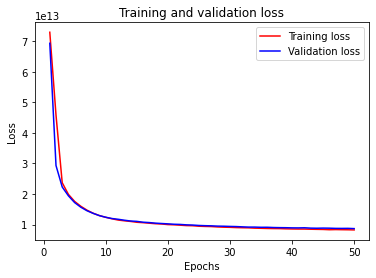

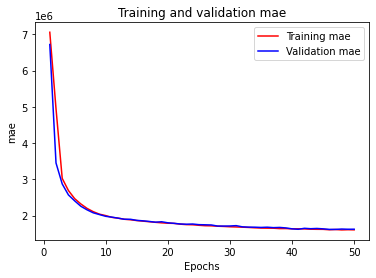

In [ ]:
def graphs(history):
    loss = history["loss"]
    val_loss = history["val_loss"]
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
 
    plt.clf()
 
    mae = history['mae']
    val_mae = history['val_mae']
    plt.plot(epochs, mae, 'r', label='Training mae')
    plt.plot(epochs, val_mae, 'b', label='Validation mae')
    plt.title('Training and validation mae')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

graphs(history)

Предсказания и подсчет коэффициента корреляции

In [ ]:
predicted_y = model.predict(x_test)
predicted_y = np.reshape(predicted_y, (predicted_y.shape[0]))

cc = np.corrcoef(predicted_y, y_test)
cc = cc[0][1]
print(f'Correlation Coefficient: {cc}')

Correlation Coefficient: 0.7924620010750917


# Keras Tuner

Создание модели

In [ ]:
def build_model(hp):
  hidden_layers = hp.Choice('hidden_layers', values=[1,2,3])
  activation_choice = hp.Choice('activation', values=['relu', 'selu', 'elu'])
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=256,max_value=512,step=32),activation=activation_choice, input_shape=(x_train.shape[1], )))
  model.add(Dropout(0.3))
  for i in range(hidden_layers):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',min_value=32//(i+1), max_value=128//(i+1),step=64//(i+1)),activation=activation_choice))
  model.add(Dense(1))  
  model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])
  return model

Поиск лучшей модели с помощью Hyperband

In [ ]:
def find_best(x_train, y_train):
  # создаю тюнер, который сможет подобрать оптимальную архитектуру модели
  tuner = Hyperband(build_model, objective="loss", max_epochs=10, hyperband_iterations=3)
  print("\n\n\n")
  # начинается автоматический подбор гиперпараметров
  print('[INFO] start searching')
  tuner.search(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
  # выбираем лучшую модель
  print("\n\n\nRESULTS SUMMARY")
  tuner.results_summary()
  print("\n\n\n")
  # получаем лучшую модель
  print("\n\n\nHERE IS THE BEST MODEL\n\n\n")
  best_params = tuner.get_best_hyperparameters()[0]
  best_model = tuner.hypermodel.build(best_params)
  best_model.summary()
  return best_model
  

best_model = find_best(x_train, y_train)





[INFO] start searching
Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7135881.0000 - mae: 7135881.0000 - val_loss: 7192932.0000 - val_mae: 7192932.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7053404.5000 - mae: 7053404.5000 - val_loss: 7010590.0000 - val_mae: 7010590.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7135626.0000 - mae: 7135626.0000 - val_loss: 7190584.5000 - val_mae: 7190584.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7025555.5000 - mae: 7025555.5000 - val_loss: 6922822.0000 - val_mae: 6922822.0000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7140172.0000 - mae: 7140172.0000 - val_loss: 7212498.0000 - val_mae: 7212498.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140166.0000 - mae: 7140166.0000 - val_loss: 7212493.0000 - val_mae: 7212493.0000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7136628.0000 - mae: 7136628.0000 - val_loss: 7196135.5000 - val_mae: 7196135.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7066208.5000 - mae: 7066208.5000 - val_loss: 7040549.0000 - val_mae: 7040549.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7096534.0000 - mae: 7096534.0000 - val_loss: 6948220.0000 - val_mae: 6948220.0000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 5568813.5000 - mae: 5568813.5000 - val_loss: 4175391.0000 - val_mae: 4175391.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7135925.0000 - mae: 7135925.0000 - val_loss: 7193015.5000 - val_mae: 7193015.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7053416.5000 - mae: 7053416.5000 - val_loss: 7009454.5000 - val_mae: 7009454.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140160.0000 - mae: 7140160.0000 - val_loss: 7212483.5000 - val_mae: 7212483.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 7140148.5000 - mae: 7140148.5000 - val_loss: 7212471.5000 - val_mae: 7212471.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140177.5000 - mae: 7140177.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 7140178.0000 - mae: 7140178.0000 - val_loss: 7212508.5000 - val_mae: 7212508.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7107501.0000 - mae: 7107501.0000 - val_loss: 7016894.0000 - val_mae: 7016894.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 5879471.5000 - mae: 5879471.5000 - val_loss: 4558091.0000 - val_mae: 4558091.0000


Epoch 1/2
134/134 [==============================] - 1s 11ms/step - loss: 7140169.0000 - mae: 7140169.0000 - val_loss: 7212498.0000 - val_mae: 7212498.0000
Epoch 2/2
134/134 [==============================] - 1s 9ms/step - loss: 7140166.0000 - mae: 7140166.0000 - val_loss: 7212494.0000 - val_mae: 7212494.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7124266.5000 - mae: 7124266.5000 - val_loss: 7124052.0000 - val_mae: 7124052.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 6526524.5000 - mae: 6526524.5000 - val_loss: 5644476.0000 - val_mae: 5644476.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7135697.5000 - mae: 7135697.5000 - val_loss: 7191724.5000 - val_mae: 7191724.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7047457.5000 - mae: 7047457.5000 - val_loss: 6995821.0000 - val_mae: 6995821.0000


Epoch 3/4
134/134 [==============================] - 1s 9ms/step - loss: 7101219.0000 - mae: 7101219.0000 - val_loss: 6979052.0000 - val_mae: 6979052.0000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 5698392.5000 - mae: 5698392.5000 - val_loss: 4365204.0000 - val_mae: 4365204.0000


Epoch 3/4
134/134 [==============================] - 1s 9ms/step - loss: 7105242.0000 - mae: 7105242.0000 - val_loss: 7006239.0000 - val_mae: 7006239.0000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 5803731.0000 - mae: 5803731.0000 - val_loss: 4457509.0000 - val_mae: 4457509.0000


Epoch 3/4
134/134 [==============================] - 1s 9ms/step - loss: 7118717.5000 - mae: 7118717.5000 - val_loss: 7092971.0000 - val_mae: 7092971.0000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 6338082.0000 - mae: 6338082.0000 - val_loss: 5270717.0000 - val_mae: 5270717.0000


Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 7140178.5000 - mae: 7140178.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 7140177.5000 - mae: 7140177.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7099485.5000 - mae: 7099485.5000 - val_loss: 6962049.5000 - val_mae: 6962049.5000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 5659126.0000 - mae: 5659126.0000 - val_loss: 4427574.5000 - val_mae: 4427574.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 3525224.2500 - mae: 3525224.2500 - val_loss: 3141535.7500 - val_mae: 3141535.7500
Epoch 8/10
134/134 [==============================] - 1s 7ms/step - loss: 2984130.2500 - mae: 2984130.2500 - val_loss: 2882950.5000 - val_mae: 2882950.5000
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2761829.7500 - mae: 2761829.7500 - val_loss: 2679031.5000 - val_mae: 2679031.5000
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 2579043.2500 - mae: 2579043.2500 - val_loss: 2505296.7500 - val_mae: 2505296.7500


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7107204.0000 - mae: 7107204.0000 - val_loss: 7017599.5000 - val_mae: 7017599.5000
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 5876461.0000 - mae: 5876461.0000 - val_loss: 4591926.5000 - val_mae: 4591926.5000
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 3657817.7500 - mae: 3657817.7500 - val_loss: 3198879.2500 - val_mae: 3198879.2500
Epoch 8/10
134/134 [==============================] - 1s 7ms/step - loss: 3029058.2500 - mae: 3029058.2500 - val_loss: 2933811.5000 - val_mae: 2933811.5000
Epoch 9/10
134/134 [==============================] - 1s 7ms/step - loss: 2810307.2500 - mae: 2810307.2500 - val_loss: 2729596.0000 - val_mae: 2729596.0000
Epoch 10/10
134/134 [==============================] - 1s 7ms/step - loss: 2627572.7500 - mae: 2627572.7500 - val_loss: 2555234.7500 - val_mae: 2555234.7500


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7140170.0000 - mae: 7140170.0000 - val_loss: 7212491.5000 - val_mae: 7212491.5000
Epoch 2/4
134/134 [==============================] - 1s 6ms/step - loss: 7140157.0000 - mae: 7140157.0000 - val_loss: 7212479.5000 - val_mae: 7212479.5000
Epoch 3/4
134/134 [==============================] - 1s 6ms/step - loss: 7140145.0000 - mae: 7140145.0000 - val_loss: 7212470.5000 - val_mae: 7212470.5000
Epoch 4/4
134/134 [==============================] - 1s 6ms/step - loss: 7140136.0000 - mae: 7140136.0000 - val_loss: 7212460.5000 - val_mae: 7212460.5000


Epoch 1/4
134/134 [==============================] - 1s 10ms/step - loss: 7140170.5000 - mae: 7140170.5000 - val_loss: 7212494.0000 - val_mae: 7212494.0000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 7140163.5000 - mae: 7140163.5000 - val_loss: 7212488.0000 - val_mae: 7212488.0000
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 7140155.0000 - mae: 7140155.0000 - val_loss: 7212481.5000 - val_mae: 7212481.5000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 7140151.0000 - mae: 7140151.0000 - val_loss: 7212477.0000 - val_mae: 7212477.0000


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7140154.0000 - mae: 7140154.0000 - val_loss: 7212471.5000 - val_mae: 7212471.5000
Epoch 2/4
134/134 [==============================] - 1s 6ms/step - loss: 7140131.5000 - mae: 7140131.5000 - val_loss: 7212447.5000 - val_mae: 7212447.5000
Epoch 3/4
134/134 [==============================] - 1s 6ms/step - loss: 7140107.5000 - mae: 7140107.5000 - val_loss: 7212428.5000 - val_mae: 7212428.5000
Epoch 4/4
134/134 [==============================] - 1s 6ms/step - loss: 7140087.0000 - mae: 7140087.0000 - val_loss: 7212404.0000 - val_mae: 7212404.0000


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7077300.0000 - mae: 7077300.0000 - val_loss: 6832646.5000 - val_mae: 6832646.5000
Epoch 2/4
134/134 [==============================] - 1s 7ms/step - loss: 5252895.5000 - mae: 5252895.5000 - val_loss: 3832689.7500 - val_mae: 3832689.7500
Epoch 3/4
134/134 [==============================] - 1s 7ms/step - loss: 3249265.0000 - mae: 3249265.0000 - val_loss: 3045723.0000 - val_mae: 3045723.0000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 2881762.7500 - mae: 2881762.7500 - val_loss: 2783277.7500 - val_mae: 2783277.7500


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7140156.0000 - mae: 7140156.0000 - val_loss: 7212476.0000 - val_mae: 7212476.0000
Epoch 2/4
134/134 [==============================] - 1s 6ms/step - loss: 7140136.5000 - mae: 7140136.5000 - val_loss: 7212454.5000 - val_mae: 7212454.5000
Epoch 3/4
134/134 [==============================] - 1s 6ms/step - loss: 7140116.0000 - mae: 7140116.0000 - val_loss: 7212435.5000 - val_mae: 7212435.5000
Epoch 4/4
134/134 [==============================] - 1s 6ms/step - loss: 7140097.5000 - mae: 7140097.5000 - val_loss: 7212415.5000 - val_mae: 7212415.5000


Epoch 1/4
134/134 [==============================] - 1s 9ms/step - loss: 7135937.5000 - mae: 7135937.5000 - val_loss: 7192906.5000 - val_mae: 7192906.5000
Epoch 2/4
134/134 [==============================] - 1s 7ms/step - loss: 7053663.0000 - mae: 7053663.0000 - val_loss: 7009407.5000 - val_mae: 7009407.5000
Epoch 3/4
134/134 [==============================] - 1s 7ms/step - loss: 6709205.0000 - mae: 6709205.0000 - val_loss: 6467188.5000 - val_mae: 6467188.5000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 5996543.5000 - mae: 5996543.5000 - val_loss: 5630926.5000 - val_mae: 5630926.5000


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7090960.0000 - mae: 7090960.0000 - val_loss: 6912342.0000 - val_mae: 6912342.0000
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 5487301.0000 - mae: 5487301.0000 - val_loss: 4180611.7500 - val_mae: 4180611.7500
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 3380445.7500 - mae: 3380445.7500 - val_loss: 3088763.7500 - val_mae: 3088763.7500
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 2924506.7500 - mae: 2924506.7500 - val_loss: 2823886.5000 - val_mae: 2823886.5000
Epoch 9/10
134/134 [==============================] - 1s 7ms/step - loss: 2694158.0000 - mae: 2694158.0000 - val_loss: 2609196.7500 - val_mae: 2609196.7500
Epoch 10/10
134/134 [==============================] - 1s 7ms/step - loss: 2515299.0000 - mae: 2515299.0000 - val_loss: 2435772.2500 - val_mae: 2435772.2500


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7136181.5000 - mae: 7136181.5000 - val_loss: 7194433.5000 - val_mae: 7194433.5000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 7060880.5000 - mae: 7060880.5000 - val_loss: 7028317.5000 - val_mae: 7028317.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 6749519.0000 - mae: 6749519.0000 - val_loss: 6537478.5000 - val_mae: 6537478.5000
Epoch 8/10
134/134 [==============================] - 1s 7ms/step - loss: 6092740.0000 - mae: 6092740.0000 - val_loss: 5746133.5000 - val_mae: 5746133.5000
Epoch 9/10
134/134 [==============================] - 1s 7ms/step - loss: 5278316.0000 - mae: 5278316.0000 - val_loss: 4972574.0000 - val_mae: 4972574.0000
Epoch 10/10
134/134 [==============================] - 1s 7ms/step - loss: 4598721.0000 - mae: 4598721.0000 - val_loss: 4375256.0000 - val_mae: 4375256.0000


Epoch 1/10
134/134 [==============================] - 1s 9ms/step - loss: 7140176.5000 - mae: 7140176.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 7140178.0000 - mae: 7140178.0000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 7140179.0000 - mae: 7140179.0000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 7140178.5000 - mae: 7140178.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 7140178.5000 - mae: 7140178.5000 - val_loss: 7212508.0000 - val_mae: 7212508.0000
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 7140179.0000 - mae: 7140179.0000 - val_loss: 7212508.0000 - val_mae: 7212508.0000
Epoch 7/10
134/134 [==============================] - 1s 7ms/ste

Epoch 1/10
134/134 [==============================] - 1s 9ms/step - loss: 7140168.5000 - mae: 7140168.5000 - val_loss: 7212494.5000 - val_mae: 7212494.5000
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 7140160.5000 - mae: 7140160.5000 - val_loss: 7212488.5000 - val_mae: 7212488.5000
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 7140157.0000 - mae: 7140157.0000 - val_loss: 7212482.5000 - val_mae: 7212482.5000
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 7140148.5000 - mae: 7140148.5000 - val_loss: 7212477.0000 - val_mae: 7212477.0000
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 7140145.5000 - mae: 7140145.5000 - val_loss: 7212470.0000 - val_mae: 7212470.0000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 7140137.0000 - mae: 7140137.0000 - val_loss: 7212463.5000 - val_mae: 7212463.5000
Epoch 7/10
134/134 [==============================] - 1s 7ms/ste

Epoch 1/10
134/134 [==============================] - 1s 9ms/step - loss: 6980491.5000 - mae: 6980491.5000 - val_loss: 6040787.0000 - val_mae: 6040787.0000
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 3971791.0000 - mae: 3971791.0000 - val_loss: 3111027.0000 - val_mae: 3111027.0000
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 2890874.0000 - mae: 2890874.0000 - val_loss: 2714881.0000 - val_mae: 2714881.0000
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 2566923.0000 - mae: 2566923.0000 - val_loss: 2435052.0000 - val_mae: 2435052.0000
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 2333218.2500 - mae: 2333218.2500 - val_loss: 2216083.0000 - val_mae: 2216083.0000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 2155770.7500 - mae: 2155770.7500 - val_loss: 2055731.1250 - val_mae: 2055731.1250
Epoch 7/10
134/134 [==============================] - 1s 7ms/ste

Epoch 1/10
134/134 [==============================] - 1s 8ms/step - loss: 7136767.0000 - mae: 7136767.0000 - val_loss: 7197060.0000 - val_mae: 7197060.0000
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 7072916.5000 - mae: 7072916.5000 - val_loss: 7056339.0000 - val_mae: 7056339.0000
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 6811112.5000 - mae: 6811112.5000 - val_loss: 6642257.5000 - val_mae: 6642257.5000
Epoch 4/10
134/134 [==============================] - 1s 6ms/step - loss: 6236081.0000 - mae: 6236081.0000 - val_loss: 5920159.5000 - val_mae: 5920159.5000
Epoch 5/10
134/134 [==============================] - 1s 6ms/step - loss: 5469351.0000 - mae: 5469351.0000 - val_loss: 5168857.5000 - val_mae: 5168857.5000
Epoch 6/10
134/134 [==============================] - 1s 6ms/step - loss: 4821370.0000 - mae: 4821370.0000 - val_loss: 4630822.0000 - val_mae: 4630822.0000
Epoch 7/10
134/134 [==============================] - 1s 7ms/ste

Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140169.5000 - mae: 7140169.5000 - val_loss: 7212495.5000 - val_mae: 7212495.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 7140163.0000 - mae: 7140163.0000 - val_loss: 7212489.5000 - val_mae: 7212489.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140166.0000 - mae: 7140166.0000 - val_loss: 7212493.0000 - val_mae: 7212493.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140159.0000 - mae: 7140159.0000 - val_loss: 7212484.0000 - val_mae: 7212484.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7034655.0000 - mae: 7034655.0000 - val_loss: 6450092.5000 - val_mae: 6450092.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 4261752.5000 - mae: 4261752.5000 - val_loss: 3200231.2500 - val_mae: 3200231.2500


Epoch 1/2
134/134 [==============================] - 1s 10ms/step - loss: 7089716.5000 - mae: 7089716.5000 - val_loss: 6906827.5000 - val_mae: 6906827.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 5449576.0000 - mae: 5449576.0000 - val_loss: 4137218.7500 - val_mae: 4137218.7500


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7140174.5000 - mae: 7140174.5000 - val_loss: 7212502.0000 - val_mae: 7212502.0000
Epoch 2/2
134/134 [==============================] - 1s 6ms/step - loss: 7140172.5000 - mae: 7140172.5000 - val_loss: 7212500.0000 - val_mae: 7212500.0000


Epoch 1/2
134/134 [==============================] - 1s 10ms/step - loss: 7134346.5000 - mae: 7134346.5000 - val_loss: 7173872.0000 - val_mae: 7173872.0000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 6635417.0000 - mae: 6635417.0000 - val_loss: 5642741.0000 - val_mae: 5642741.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7076809.0000 - mae: 7076809.0000 - val_loss: 6814998.5000 - val_mae: 6814998.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 5182555.5000 - mae: 5182555.5000 - val_loss: 3799757.7500 - val_mae: 3799757.7500


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7105418.0000 - mae: 7105418.0000 - val_loss: 6995595.0000 - val_mae: 6995595.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 5735387.5000 - mae: 5735387.5000 - val_loss: 4424312.5000 - val_mae: 4424312.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140161.5000 - mae: 7140161.5000 - val_loss: 7212479.5000 - val_mae: 7212479.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140142.0000 - mae: 7140142.0000 - val_loss: 7212462.0000 - val_mae: 7212462.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 6856256.5000 - mae: 6856256.5000 - val_loss: 5299747.0000 - val_mae: 5299747.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 3579083.5000 - mae: 3579083.5000 - val_loss: 2980593.7500 - val_mae: 2980593.7500


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7128176.5000 - mae: 7128176.5000 - val_loss: 7142731.5000 - val_mae: 7142731.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 6594872.5000 - mae: 6594872.5000 - val_loss: 5764407.0000 - val_mae: 5764407.0000


Epoch 1/2
134/134 [==============================] - 1s 10ms/step - loss: 7140160.5000 - mae: 7140160.5000 - val_loss: 7212479.5000 - val_mae: 7212479.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140139.0000 - mae: 7140139.0000 - val_loss: 7212460.5000 - val_mae: 7212460.5000


Epoch 3/4
134/134 [==============================] - 1s 10ms/step - loss: 6922829.0000 - mae: 6922829.0000 - val_loss: 5668238.0000 - val_mae: 5668238.0000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 3677218.2500 - mae: 3677218.2500 - val_loss: 3023808.7500 - val_mae: 3023808.7500


Epoch 3/4
134/134 [==============================] - 1s 10ms/step - loss: 6949448.0000 - mae: 6949448.0000 - val_loss: 5955939.5000 - val_mae: 5955939.5000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 3930874.0000 - mae: 3930874.0000 - val_loss: 3118385.5000 - val_mae: 3118385.5000


Epoch 3/4
134/134 [==============================] - 1s 10ms/step - loss: 7092062.5000 - mae: 7092062.5000 - val_loss: 6914745.5000 - val_mae: 6914745.5000
Epoch 4/4
134/134 [==============================] - 1s 9ms/step - loss: 5438320.5000 - mae: 5438320.5000 - val_loss: 4033853.2500 - val_mae: 4033853.2500


Epoch 3/4
134/134 [==============================] - 2s 12ms/step - loss: 7102096.5000 - mae: 7102096.5000 - val_loss: 6978319.0000 - val_mae: 6978319.0000
Epoch 4/4
134/134 [==============================] - 1s 10ms/step - loss: 5727752.5000 - mae: 5727752.5000 - val_loss: 4556946.5000 - val_mae: 4556946.5000


Epoch 5/10
134/134 [==============================] - 1s 10ms/step - loss: 6868055.0000 - mae: 6868055.0000 - val_loss: 5346739.5000 - val_mae: 5346739.5000
Epoch 6/10
134/134 [==============================] - 1s 9ms/step - loss: 3548691.7500 - mae: 3548691.7500 - val_loss: 2980384.0000 - val_mae: 2980384.0000
Epoch 7/10
134/134 [==============================] - 1s 10ms/step - loss: 2751818.0000 - mae: 2751818.0000 - val_loss: 2585157.2500 - val_mae: 2585157.2500
Epoch 8/10
134/134 [==============================] - 1s 9ms/step - loss: 2426803.7500 - mae: 2426803.7500 - val_loss: 2299120.7500 - val_mae: 2299120.7500
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2195033.7500 - mae: 2195033.7500 - val_loss: 2087176.5000 - val_mae: 2087176.5000
Epoch 10/10
134/134 [==============================] - 1s 9ms/step - loss: 2011617.1250 - mae: 2011617.1250 - val_loss: 1948397.5000 - val_mae: 1948397.5000


Epoch 5/10
134/134 [==============================] - 1s 11ms/step - loss: 7065412.0000 - mae: 7065412.0000 - val_loss: 6660595.0000 - val_mae: 6660595.0000
Epoch 6/10
134/134 [==============================] - 1s 9ms/step - loss: 4662890.5000 - mae: 4662890.5000 - val_loss: 3339994.5000 - val_mae: 3339994.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 3030199.2500 - mae: 3030199.2500 - val_loss: 2870608.0000 - val_mae: 2870608.0000
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 2715073.2500 - mae: 2715073.2500 - val_loss: 2600289.2500 - val_mae: 2600289.2500
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2478421.0000 - mae: 2478421.0000 - val_loss: 2385891.2500 - val_mae: 2385891.2500
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 2295279.2500 - mae: 2295279.2500 - val_loss: 2213438.5000 - val_mae: 2213438.5000


Epoch 1/4
134/134 [==============================] - 1s 10ms/step - loss: 7114148.0000 - mae: 7114148.0000 - val_loss: 7063866.0000 - val_mae: 7063866.0000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 6169012.0000 - mae: 6169012.0000 - val_loss: 5080493.0000 - val_mae: 5080493.0000
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 4161635.7500 - mae: 4161635.7500 - val_loss: 3436833.7500 - val_mae: 3436833.7500
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 3133623.5000 - mae: 3133623.5000 - val_loss: 3023668.0000 - val_mae: 3023668.0000


Epoch 1/4
134/134 [==============================] - 1s 9ms/step - loss: 7140172.5000 - mae: 7140172.5000 - val_loss: 7212495.5000 - val_mae: 7212495.5000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 7140163.5000 - mae: 7140163.5000 - val_loss: 7212491.0000 - val_mae: 7212491.0000
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 7140158.0000 - mae: 7140158.0000 - val_loss: 7212484.0000 - val_mae: 7212484.0000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 7140154.5000 - mae: 7140154.5000 - val_loss: 7212478.5000 - val_mae: 7212478.5000


Epoch 1/4
134/134 [==============================] - 1s 10ms/step - loss: 7140168.0000 - mae: 7140168.0000 - val_loss: 7212495.5000 - val_mae: 7212495.5000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 7140163.0000 - mae: 7140163.0000 - val_loss: 7212492.0000 - val_mae: 7212492.0000
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 7140158.5000 - mae: 7140158.5000 - val_loss: 7212484.0000 - val_mae: 7212484.0000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 7140153.5000 - mae: 7140153.5000 - val_loss: 7212479.5000 - val_mae: 7212479.5000


Epoch 1/4
134/134 [==============================] - 1s 9ms/step - loss: 7140172.5000 - mae: 7140172.5000 - val_loss: 7212500.0000 - val_mae: 7212500.0000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 7140171.5000 - mae: 7140171.5000 - val_loss: 7212498.5000 - val_mae: 7212498.5000
Epoch 3/4
134/134 [==============================] - 1s 7ms/step - loss: 7140167.5000 - mae: 7140167.5000 - val_loss: 7212495.5000 - val_mae: 7212495.5000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 7140166.5000 - mae: 7140166.5000 - val_loss: 7212494.0000 - val_mae: 7212494.0000


Epoch 1/4
134/134 [==============================] - 1s 10ms/step - loss: 7046014.5000 - mae: 7046014.5000 - val_loss: 6579190.5000 - val_mae: 6579190.5000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 4505440.5000 - mae: 4505440.5000 - val_loss: 3264458.2500 - val_mae: 3264458.2500
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 3005733.0000 - mae: 3005733.0000 - val_loss: 2852369.2500 - val_mae: 2852369.2500
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 2692071.5000 - mae: 2692071.5000 - val_loss: 2574782.0000 - val_mae: 2574782.0000


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7137651.0000 - mae: 7137651.0000 - val_loss: 7201032.5000 - val_mae: 7201032.5000
Epoch 2/4
134/134 [==============================] - 1s 6ms/step - loss: 7089912.0000 - mae: 7089912.0000 - val_loss: 7095765.5000 - val_mae: 7095765.5000
Epoch 3/4
134/134 [==============================] - 1s 6ms/step - loss: 6893831.0000 - mae: 6893831.0000 - val_loss: 6783892.5000 - val_mae: 6783892.5000
Epoch 4/4
134/134 [==============================] - 1s 6ms/step - loss: 6450450.0000 - mae: 6450450.0000 - val_loss: 6204886.0000 - val_mae: 6204886.0000


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7082273.5000 - mae: 7082273.5000 - val_loss: 6808328.5000 - val_mae: 6808328.5000
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 4898522.0000 - mae: 4898522.0000 - val_loss: 3469218.5000 - val_mae: 3469218.5000
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 3113411.0000 - mae: 3113411.0000 - val_loss: 2945269.5000 - val_mae: 2945269.5000
Epoch 8/10
134/134 [==============================] - 1s 7ms/step - loss: 2794597.7500 - mae: 2794597.7500 - val_loss: 2681816.7500 - val_mae: 2681816.7500
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2560037.2500 - mae: 2560037.2500 - val_loss: 2460568.5000 - val_mae: 2460568.5000
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 2373084.7500 - mae: 2373084.7500 - val_loss: 2285029.0000 - val_mae: 2285029.0000


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7118985.5000 - mae: 7118985.5000 - val_loss: 7091082.0000 - val_mae: 7091082.0000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 6275734.5000 - mae: 6275734.5000 - val_loss: 5136552.0000 - val_mae: 5136552.0000
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 4150556.5000 - mae: 4150556.5000 - val_loss: 3460285.2500 - val_mae: 3460285.2500
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 3169357.7500 - mae: 3169357.7500 - val_loss: 3059628.5000 - val_mae: 3059628.5000
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2931832.7500 - mae: 2931832.7500 - val_loss: 2868620.2500 - val_mae: 2868620.2500
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 2757902.2500 - mae: 2757902.2500 - val_loss: 2701842.2500 - val_mae: 2701842.2500


Epoch 1/10
134/134 [==============================] - 1s 10ms/step - loss: 7140173.5000 - mae: 7140173.5000 - val_loss: 7212499.5000 - val_mae: 7212499.5000
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 7140171.5000 - mae: 7140171.5000 - val_loss: 7212495.5000 - val_mae: 7212495.5000
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 7140165.0000 - mae: 7140165.0000 - val_loss: 7212493.0000 - val_mae: 7212493.0000
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 7140162.5000 - mae: 7140162.5000 - val_loss: 7212488.5000 - val_mae: 7212488.5000
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 7140159.0000 - mae: 7140159.0000 - val_loss: 7212484.0000 - val_mae: 7212484.0000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 7140153.0000 - mae: 7140153.0000 - val_loss: 7212479.5000 - val_mae: 7212479.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/st

Epoch 1/10
134/134 [==============================] - 1s 9ms/step - loss: 7118639.0000 - mae: 7118639.0000 - val_loss: 7085317.0000 - val_mae: 7085317.0000
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 6227148.5000 - mae: 6227148.5000 - val_loss: 5139006.5000 - val_mae: 5139006.5000
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 4230790.0000 - mae: 4230790.0000 - val_loss: 3499505.7500 - val_mae: 3499505.7500
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 3170714.2500 - mae: 3170714.2500 - val_loss: 3041618.2500 - val_mae: 3041618.2500
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 2918635.0000 - mae: 2918635.0000 - val_loss: 2847764.2500 - val_mae: 2847764.2500
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 2747596.7500 - mae: 2747596.7500 - val_loss: 2677585.0000 - val_mae: 2677585.0000
Epoch 7/10
134/134 [==============================] - 1s 8ms/ste

Epoch 1/10
134/134 [==============================] - 1s 10ms/step - loss: 6991332.0000 - mae: 6991332.0000 - val_loss: 6184295.0000 - val_mae: 6184295.0000
Epoch 2/10
134/134 [==============================] - 1s 9ms/step - loss: 4003627.0000 - mae: 4003627.0000 - val_loss: 3136285.5000 - val_mae: 3136285.5000
Epoch 3/10
134/134 [==============================] - 1s 9ms/step - loss: 2916478.2500 - mae: 2916478.2500 - val_loss: 2754113.0000 - val_mae: 2754113.0000
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 2606538.5000 - mae: 2606538.5000 - val_loss: 2473631.5000 - val_mae: 2473631.5000
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 2374191.2500 - mae: 2374191.2500 - val_loss: 2255153.7500 - val_mae: 2255153.7500
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 2191706.0000 - mae: 2191706.0000 - val_loss: 2090824.6250 - val_mae: 2090824.6250
Epoch 7/10
134/134 [==============================] - 1s 7ms/st

Epoch 1/10
134/134 [==============================] - 1s 11ms/step - loss: 6761339.5000 - mae: 6761339.5000 - val_loss: 4949181.0000 - val_mae: 4949181.0000
Epoch 2/10
134/134 [==============================] - 1s 9ms/step - loss: 3487330.5000 - mae: 3487330.5000 - val_loss: 2957773.2500 - val_mae: 2957773.2500
Epoch 3/10
134/134 [==============================] - 1s 9ms/step - loss: 2722556.5000 - mae: 2722556.5000 - val_loss: 2545427.7500 - val_mae: 2545427.7500
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 2378341.7500 - mae: 2378341.7500 - val_loss: 2260947.2500 - val_mae: 2260947.2500
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 2151543.7500 - mae: 2151543.7500 - val_loss: 2051169.8750 - val_mae: 2051169.8750
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 1983236.6250 - mae: 1983236.6250 - val_loss: 1931918.5000 - val_mae: 1931918.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/st

Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7105897.0000 - mae: 7105897.0000 - val_loss: 6955339.0000 - val_mae: 6955339.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 5154129.0000 - mae: 5154129.0000 - val_loss: 3581275.5000 - val_mae: 3581275.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7127942.0000 - mae: 7127942.0000 - val_loss: 7142133.0000 - val_mae: 7142133.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 6599147.0000 - mae: 6599147.0000 - val_loss: 5755696.0000 - val_mae: 5755696.0000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7140166.0000 - mae: 7140166.0000 - val_loss: 7212488.5000 - val_mae: 7212488.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140154.0000 - mae: 7140154.0000 - val_loss: 7212477.0000 - val_mae: 7212477.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7136078.5000 - mae: 7136078.5000 - val_loss: 7193897.5000 - val_mae: 7193897.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7057711.5000 - mae: 7057711.5000 - val_loss: 7020389.5000 - val_mae: 7020389.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7106116.0000 - mae: 7106116.0000 - val_loss: 7010702.5000 - val_mae: 7010702.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 5880139.0000 - mae: 5880139.0000 - val_loss: 4688015.0000 - val_mae: 4688015.0000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7140149.5000 - mae: 7140149.5000 - val_loss: 7212462.0000 - val_mae: 7212462.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140118.5000 - mae: 7140118.5000 - val_loss: 7212434.5000 - val_mae: 7212434.5000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140177.0000 - mae: 7140177.0000 - val_loss: 7212507.0000 - val_mae: 7212507.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7140176.5000 - mae: 7140176.5000 - val_loss: 7212507.0000 - val_mae: 7212507.0000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7140154.5000 - mae: 7140154.5000 - val_loss: 7212472.5000 - val_mae: 7212472.5000
Epoch 2/2
134/134 [==============================] - 1s 6ms/step - loss: 7140134.0000 - mae: 7140134.0000 - val_loss: 7212452.0000 - val_mae: 7212452.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7015769.0000 - mae: 7015769.0000 - val_loss: 6311188.5000 - val_mae: 6311188.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 4139025.5000 - mae: 4139025.5000 - val_loss: 3152439.0000 - val_mae: 3152439.0000


Epoch 1/2
134/134 [==============================] - 1s 9ms/step - loss: 7140168.5000 - mae: 7140168.5000 - val_loss: 7212495.5000 - val_mae: 7212495.5000
Epoch 2/2
134/134 [==============================] - 1s 8ms/step - loss: 7140165.0000 - mae: 7140165.0000 - val_loss: 7212492.0000 - val_mae: 7212492.0000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7136779.5000 - mae: 7136779.5000 - val_loss: 7197022.5000 - val_mae: 7197022.5000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7072147.5000 - mae: 7072147.5000 - val_loss: 7053983.5000 - val_mae: 7053983.5000


Epoch 1/2
134/134 [==============================] - 1s 8ms/step - loss: 7136779.0000 - mae: 7136779.0000 - val_loss: 7196734.0000 - val_mae: 7196734.0000
Epoch 2/2
134/134 [==============================] - 1s 7ms/step - loss: 7069822.5000 - mae: 7069822.5000 - val_loss: 7047466.0000 - val_mae: 7047466.0000


Epoch 3/4
134/134 [==============================] - 1s 10ms/step - loss: 7007629.5000 - mae: 7007629.5000 - val_loss: 6258077.0000 - val_mae: 6258077.0000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 4093651.7500 - mae: 4093651.7500 - val_loss: 3148566.5000 - val_mae: 3148566.5000


Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 7097403.0000 - mae: 7097403.0000 - val_loss: 6904309.0000 - val_mae: 6904309.0000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 5051867.0000 - mae: 5051867.0000 - val_loss: 3568430.5000 - val_mae: 3568430.5000


Epoch 3/4
134/134 [==============================] - 1s 9ms/step - loss: 7102301.5000 - mae: 7102301.5000 - val_loss: 6984576.5000 - val_mae: 6984576.5000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 5754723.0000 - mae: 5754723.0000 - val_loss: 4502631.5000 - val_mae: 4502631.5000


Epoch 3/4
134/134 [==============================] - 1s 9ms/step - loss: 7130037.5000 - mae: 7130037.5000 - val_loss: 7154754.5000 - val_mae: 7154754.5000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 6701951.0000 - mae: 6701951.0000 - val_loss: 6018388.0000 - val_mae: 6018388.0000


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7002219.5000 - mae: 7002219.5000 - val_loss: 6197509.0000 - val_mae: 6197509.0000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 4081529.7500 - mae: 4081529.7500 - val_loss: 3138759.5000 - val_mae: 3138759.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 2903722.5000 - mae: 2903722.5000 - val_loss: 2738639.0000 - val_mae: 2738639.0000
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 2582034.7500 - mae: 2582034.7500 - val_loss: 2452358.5000 - val_mae: 2452358.5000
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2342007.0000 - mae: 2342007.0000 - val_loss: 2237647.2500 - val_mae: 2237647.2500
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 2159898.0000 - mae: 2159898.0000 - val_loss: 2065236.8750 - val_mae: 2065236.8750


Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 7090190.0000 - mae: 7090190.0000 - val_loss: 6849572.5000 - val_mae: 6849572.5000
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 4847551.5000 - mae: 4847551.5000 - val_loss: 3415065.5000 - val_mae: 3415065.5000
Epoch 7/10
134/134 [==============================] - 1s 7ms/step - loss: 3097697.0000 - mae: 3097697.0000 - val_loss: 2934178.7500 - val_mae: 2934178.7500
Epoch 8/10
134/134 [==============================] - 1s 7ms/step - loss: 2785886.7500 - mae: 2785886.7500 - val_loss: 2665556.7500 - val_mae: 2665556.7500
Epoch 9/10
134/134 [==============================] - 1s 7ms/step - loss: 2552460.7500 - mae: 2552460.7500 - val_loss: 2448315.2500 - val_mae: 2448315.2500
Epoch 10/10
134/134 [==============================] - 1s 7ms/step - loss: 2365033.0000 - mae: 2365033.0000 - val_loss: 2277313.0000 - val_mae: 2277313.0000


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7140174.0000 - mae: 7140174.0000 - val_loss: 7212504.0000 - val_mae: 7212504.0000
Epoch 2/4
134/134 [==============================] - 1s 6ms/step - loss: 7140175.0000 - mae: 7140175.0000 - val_loss: 7212503.5000 - val_mae: 7212503.5000
Epoch 3/4
134/134 [==============================] - 1s 6ms/step - loss: 7140174.0000 - mae: 7140174.0000 - val_loss: 7212503.0000 - val_mae: 7212503.0000
Epoch 4/4
134/134 [==============================] - 1s 6ms/step - loss: 7140173.5000 - mae: 7140173.5000 - val_loss: 7212501.5000 - val_mae: 7212501.5000


Epoch 1/4
134/134 [==============================] - 1s 9ms/step - loss: 7135140.0000 - mae: 7135140.0000 - val_loss: 7189336.5000 - val_mae: 7189336.5000
Epoch 2/4
134/134 [==============================] - 1s 7ms/step - loss: 7037137.0000 - mae: 7037137.0000 - val_loss: 6972237.0000 - val_mae: 6972237.0000
Epoch 3/4
134/134 [==============================] - 1s 7ms/step - loss: 6631108.0000 - mae: 6631108.0000 - val_loss: 6340221.5000 - val_mae: 6340221.5000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 5811767.0000 - mae: 5811767.0000 - val_loss: 5390762.0000 - val_mae: 5390762.0000


Epoch 1/4
134/134 [==============================] - 1s 9ms/step - loss: 7140173.5000 - mae: 7140173.5000 - val_loss: 7212500.0000 - val_mae: 7212500.0000
Epoch 2/4
134/134 [==============================] - 1s 7ms/step - loss: 7140171.0000 - mae: 7140171.0000 - val_loss: 7212498.5000 - val_mae: 7212498.5000
Epoch 3/4
134/134 [==============================] - 1s 7ms/step - loss: 7140171.0000 - mae: 7140171.0000 - val_loss: 7212496.0000 - val_mae: 7212496.0000
Epoch 4/4
134/134 [==============================] - 1s 7ms/step - loss: 7140166.0000 - mae: 7140166.0000 - val_loss: 7212494.5000 - val_mae: 7212494.5000


Epoch 1/4
134/134 [==============================] - 1s 8ms/step - loss: 7137121.5000 - mae: 7137121.5000 - val_loss: 7198656.5000 - val_mae: 7198656.5000
Epoch 2/4
134/134 [==============================] - 1s 6ms/step - loss: 7079548.0000 - mae: 7079548.0000 - val_loss: 7071236.0000 - val_mae: 7071236.0000
Epoch 3/4
134/134 [==============================] - 1s 6ms/step - loss: 6841482.0000 - mae: 6841482.0000 - val_loss: 6694211.5000 - val_mae: 6694211.5000
Epoch 4/4
134/134 [==============================] - 1s 6ms/step - loss: 6318521.0000 - mae: 6318521.0000 - val_loss: 6038085.5000 - val_mae: 6038085.5000


Epoch 1/4
134/134 [==============================] - 1s 10ms/step - loss: 6672407.0000 - mae: 6672407.0000 - val_loss: 4847617.0000 - val_mae: 4847617.0000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 3391649.2500 - mae: 3391649.2500 - val_loss: 2889625.7500 - val_mae: 2889625.7500
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 2647569.7500 - mae: 2647569.7500 - val_loss: 2471752.7500 - val_mae: 2471752.7500
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 2308028.2500 - mae: 2308028.2500 - val_loss: 2172962.5000 - val_mae: 2172962.5000


Epoch 1/4
134/134 [==============================] - 1s 10ms/step - loss: 7064056.0000 - mae: 7064056.0000 - val_loss: 6723715.5000 - val_mae: 6723715.5000
Epoch 2/4
134/134 [==============================] - 1s 8ms/step - loss: 4800696.5000 - mae: 4800696.5000 - val_loss: 3415361.0000 - val_mae: 3415361.0000
Epoch 3/4
134/134 [==============================] - 1s 8ms/step - loss: 3102387.0000 - mae: 3102387.0000 - val_loss: 2950376.5000 - val_mae: 2950376.5000
Epoch 4/4
134/134 [==============================] - 1s 8ms/step - loss: 2779972.7500 - mae: 2779972.7500 - val_loss: 2673867.7500 - val_mae: 2673867.7500


Epoch 5/10
134/134 [==============================] - 1s 10ms/step - loss: 6600146.0000 - mae: 6600146.0000 - val_loss: 4389724.5000 - val_mae: 4389724.5000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 3243606.2500 - mae: 3243606.2500 - val_loss: 2862998.7500 - val_mae: 2862998.7500
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 2626764.0000 - mae: 2626764.0000 - val_loss: 2453816.7500 - val_mae: 2453816.7500
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 2294348.2500 - mae: 2294348.2500 - val_loss: 2169551.5000 - val_mae: 2169551.5000
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 2066716.6250 - mae: 2066716.6250 - val_loss: 1982237.0000 - val_mae: 1982237.0000
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 1919825.0000 - mae: 1919825.0000 - val_loss: 1877422.1250 - val_mae: 1877422.1250


Epoch 5/10
134/134 [==============================] - 1s 10ms/step - loss: 7140178.5000 - mae: 7140178.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 7140179.5000 - mae: 7140179.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 7/10
134/134 [==============================] - 1s 8ms/step - loss: 7140177.5000 - mae: 7140177.5000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 8/10
134/134 [==============================] - 1s 8ms/step - loss: 7140180.0000 - mae: 7140180.0000 - val_loss: 7212508.5000 - val_mae: 7212508.5000
Epoch 9/10
134/134 [==============================] - 1s 8ms/step - loss: 7140177.5000 - mae: 7140177.5000 - val_loss: 7212508.0000 - val_mae: 7212508.0000
Epoch 10/10
134/134 [==============================] - 1s 8ms/step - loss: 7140178.0000 - mae: 7140178.0000 - val_loss: 7212508.0000 - val_mae: 7212508.0000


Epoch 1/10
134/134 [==============================] - 1s 8ms/step - loss: 7137067.5000 - mae: 7137067.5000 - val_loss: 7198372.0000 - val_mae: 7198372.0000
Epoch 2/10
134/134 [==============================] - 1s 6ms/step - loss: 7077706.0000 - mae: 7077706.0000 - val_loss: 7067412.5000 - val_mae: 7067412.5000
Epoch 3/10
134/134 [==============================] - 1s 6ms/step - loss: 6831955.5000 - mae: 6831955.5000 - val_loss: 6678751.5000 - val_mae: 6678751.5000
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 6291410.5000 - mae: 6291410.5000 - val_loss: 5996382.0000 - val_mae: 5996382.0000
Epoch 5/10
134/134 [==============================] - 1s 6ms/step - loss: 5540648.0000 - mae: 5540648.0000 - val_loss: 5220106.0000 - val_mae: 5220106.0000
Epoch 6/10
134/134 [==============================] - 1s 6ms/step - loss: 4851888.5000 - mae: 4851888.5000 - val_loss: 4640404.5000 - val_mae: 4640404.5000
Epoch 7/10
134/134 [==============================] - 1s 6ms/ste

Epoch 1/10
134/134 [==============================] - 1s 9ms/step - loss: 7135721.5000 - mae: 7135721.5000 - val_loss: 7192015.5000 - val_mae: 7192015.5000
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 7048698.0000 - mae: 7048698.0000 - val_loss: 6999263.5000 - val_mae: 6999263.5000
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 6689528.0000 - mae: 6689528.0000 - val_loss: 6439890.0000 - val_mae: 6439890.0000
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 5958506.0000 - mae: 5958506.0000 - val_loss: 5579744.5000 - val_mae: 5579744.5000
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 5101725.0000 - mae: 5101725.0000 - val_loss: 4811671.0000 - val_mae: 4811671.0000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 4422228.5000 - mae: 4422228.5000 - val_loss: 4185602.2500 - val_mae: 4185602.2500
Epoch 7/10
134/134 [==============================] - 1s 8ms/ste

Epoch 1/10
134/134 [==============================] - 1s 9ms/step - loss: 7136201.5000 - mae: 7136201.5000 - val_loss: 7193986.0000 - val_mae: 7193986.0000
Epoch 2/10
134/134 [==============================] - 1s 7ms/step - loss: 7058335.0000 - mae: 7058335.0000 - val_loss: 7019965.5000 - val_mae: 7019965.5000
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 6733161.0000 - mae: 6733161.0000 - val_loss: 6505797.5000 - val_mae: 6505797.5000
Epoch 4/10
134/134 [==============================] - 1s 7ms/step - loss: 6043915.5000 - mae: 6043915.5000 - val_loss: 5681668.5000 - val_mae: 5681668.5000
Epoch 5/10
134/134 [==============================] - 1s 7ms/step - loss: 5263625.5000 - mae: 5263625.5000 - val_loss: 5029011.0000 - val_mae: 5029011.0000
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 4698546.5000 - mae: 4698546.5000 - val_loss: 4521688.5000 - val_mae: 4521688.5000
Epoch 7/10
134/134 [==============================] - 1s 7ms/ste

Epoch 1/10
134/134 [==============================] - 1s 10ms/step - loss: 7026554.5000 - mae: 7026554.5000 - val_loss: 6372372.0000 - val_mae: 6372372.0000
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 4243733.0000 - mae: 4243733.0000 - val_loss: 3201093.7500 - val_mae: 3201093.7500
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 2944602.2500 - mae: 2944602.2500 - val_loss: 2798039.2500 - val_mae: 2798039.2500
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 2641480.2500 - mae: 2641480.2500 - val_loss: 2514615.0000 - val_mae: 2514615.0000
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 2392666.0000 - mae: 2392666.0000 - val_loss: 2297158.5000 - val_mae: 2297158.5000
Epoch 6/10
134/134 [==============================] - 1s 8ms/step - loss: 2200632.7500 - mae: 2200632.7500 - val_loss: 2119522.2500 - val_mae: 2119522.2500
Epoch 7/10
134/134 [==============================] - 1s 8ms/st

INFO:tensorflow:Oracle triggered exit



RESULTS SUMMARY









HERE IS THE BEST MODEL



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 289)               83810     
_________________________________________________________________
dense_1 (Dense)              (None, 208)               60320     
_________________________________________________________________
dropout (Dropout)            (None, 208)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 72)                15048     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3650      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 162,879
Trainable params: 162,879
Non-trainable params: 0
_________________

Обучение лучшей модели

In [ ]:
best_history = best_model.fit(x_train, y_train, epochs=50, batch_size=125, validation_split=0.3)
best_history = best_history.history
print("[INFO] Training has been finished")

Epoch 1/50
120/120 [==============================] - 1s 10ms/step - loss: 6929303.0000 - mae: 6929303.0000 - val_loss: 5738117.0000 - val_mae: 5738117.0000
Epoch 2/50
120/120 [==============================] - 1s 8ms/step - loss: 3794308.0000 - mae: 3794308.0000 - val_loss: 3050556.0000 - val_mae: 3050556.0000
Epoch 3/50
120/120 [==============================] - 1s 8ms/step - loss: 2808405.0000 - mae: 2808405.0000 - val_loss: 2648842.0000 - val_mae: 2648842.0000
Epoch 4/50
120/120 [==============================] - 1s 8ms/step - loss: 2482120.7500 - mae: 2482120.7500 - val_loss: 2362432.0000 - val_mae: 2362432.0000
Epoch 5/50
120/120 [==============================] - 1s 8ms/step - loss: 2238344.0000 - mae: 2238344.0000 - val_loss: 2150886.0000 - val_mae: 2150886.0000
Epoch 6/50
120/120 [==============================] - 1s 8ms/step - loss: 2059252.6250 - mae: 2059252.6250 - val_loss: 2002690.5000 - val_mae: 2002690.5000
Epoch 7/50
120/120 [==============================] - 1s 8ms/st

Построение графиков лучшей модели

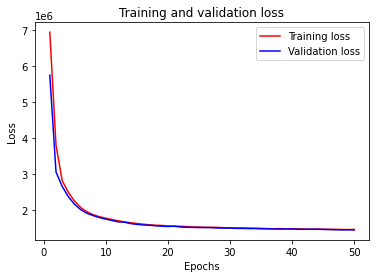

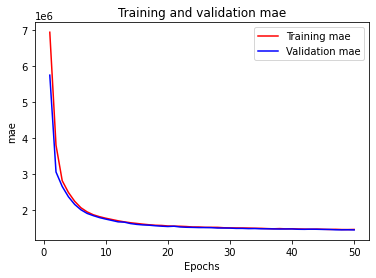

In [ ]:
graphs(best_history)

Предсказания и подсчет коэффициента корреляции лучшей модели

In [ ]:
best_predicted_y = best_model.predict(x_test)
best_predicted_y = np.reshape(best_predicted_y, (best_predicted_y.shape[0]))

best_cc = np.corrcoef(best_predicted_y, y_test)
best_cc = best_cc[0][1]
print(f'Correlation Coefficient: {best_cc}')

Correlation Coefficient: 0.7810409713483935
